# Introduction

<div class="alert alert-warning">
<font color=black>

**What?** Make the data NORMAL with the Cox-Box power transform

</font>
</div>

# Turning a distribution NORMAL

<div class="alert alert-info">
<font color=black>

- It is possible that your data does not look Gaussian or fails a normality test, but can be transformed to make it fit a Gaussian distribution.
- This will become a necessary step for those methods that can be used only for normally distributed variables.
- One technique we cam use is called Box-Cox transform also known as **Box-Cox power transformation**.
- This transformation takes in original non-normal data as input and returns fitted data along with the **lambda value** that was used to fit the non-normal distribution to normal distribution.

</font>
</div>

# Import modules

In [13]:
import numpy as np
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot as plt
from numpy.random import randn
from numpy.random import randn
from scipy.stats import boxcox
import seaborn as sns 
from IPython.display import Markdown, display
# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Generate the samples

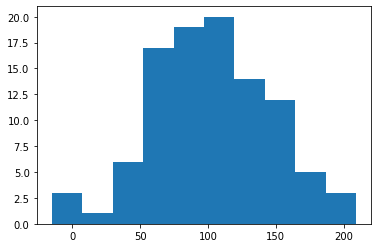

In [3]:
seed(1)
# generate a univariate data sample
data = 50 * randn(100) + 100
# histogram
pyplot.hist(data)
pyplot.show()

<div class="alert alert-info">
<font color=black>

- Do not forget to look at your **data resolution**.
- Perhaps you expect a Gaussian distribution from the data, but no matter  the size of the sample that you collect, it does not materialize. 
- A common reason for this is the resolution that you are using to collect the observations. 
- The distribution of the data may be obscured by the chosen resolution of the data or the fidelity of the observations.

</font>
</div>

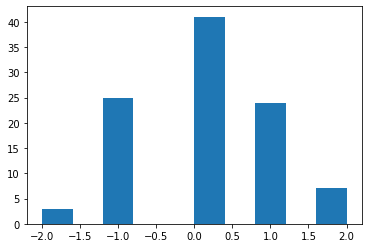

In [4]:
seed(1)
# generate a univariate data sample
data = randn(100)
# remove decimal component
data = data.round(0)
# histogram
pyplot.hist(data)
pyplot.show()

<div class="alert alert-info">
<font color=black>

- Another case where the data does not look normal is the presence of outliers. 
- These extreme values are oftencalled outliers. 
- This may require domain expertise or consultation with a domain expert in order to both design the criteria for identifying outliers and then removing them from the data sample and all data samples that you or your model expect to work with in the future. 
- The extreme values could be identified and removed in order to make the distribution more Gaussian. data.

</font>
</div>

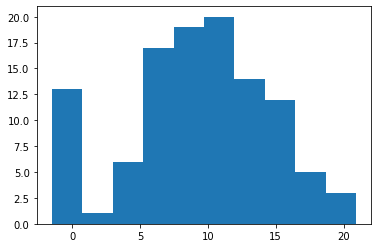

In [5]:
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
# add extreme values
data = np.append(data, np.zeros(10))
# histogram
pyplot.hist(data)
pyplot.show()

<div class="alert alert-info">
<font color=black>

- Extreme values can manifest in many ways. In addition to an abundance of rare events at the edge of the distribution, you may see a long tail on the distribution in one or both directions. 
- In plots, this can make the distribution look like it is exponential,
when in fact it might be Gaussian with an abundance of rare events in one direction. 
- You could use simple threshold values, perhaps based on the number of standard deviations from the mean, to identify and remove long tail values 

</font>
</div>

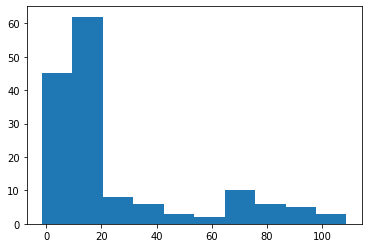

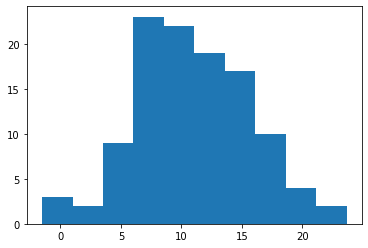

In [6]:
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)
# add long tail
data = np.append(data, tail)
# histogram
pyplot.hist(data)
pyplot.show()              


# Trim values to cut off the tail which is distorting our normal distribution
data = [x for x in data if x < 25]
# histogram
pyplot.hist(data)
pyplot.show()

# Cox-Box power transform

<div class="alert alert-info">
<font color=black>

- Box-Cox transform can be used to tunr the data into a normal distribution. 
- It can be configured to evaluate a suite of transforms automatically and select a best fit.
- In general these are some notable lambda values:
    - lambda = -1.0 is a reciprocal transform
    - lambda = -0.5 is a reciprocal square root transform
    - lambda = 0.0 is a log transform
    - lambda = 0.5 is a square root transform
    - lambda = 1.0 is no transform 

</font>
</div>

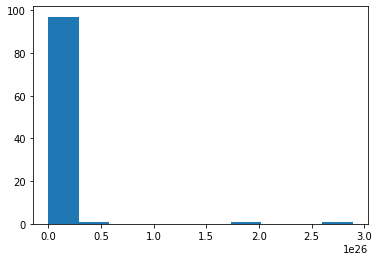

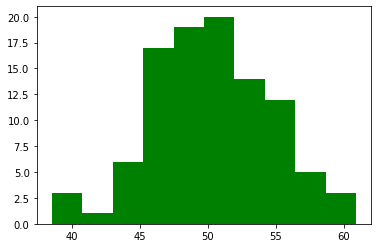

In [7]:
seed(1)
# generate two sets of univariate observations
data = 5 * randn(100) + 50
# Transform to be exponential (we are artificially changing the data, but we now the data is log-normal)
data = np.exp(data)
# histogram
pyplot.hist(data)
pyplot.show()

# power transform
data = boxcox(data, 0)
# histogram
pyplot.hist(data, color = "green")
pyplot.show()

Lambda value used for Transformation: 0.2420131978174143


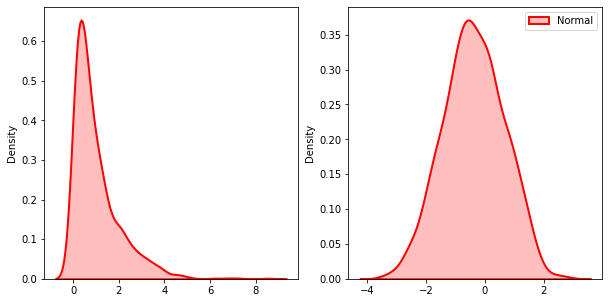

In [15]:
np.random.seed(0)

# Generate dataset
data = np.random.exponential(size=1000)

fig, ax = plt.subplots(1, 2)
#plot the distribution of data values
sns.distplot(data, hist=False, kde=True, 
             kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="red", ax = ax[0]) 

#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="red", ax = ax[1])
  
#adding legends to the subplots
plt.legend(loc = "upper right")

#rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
#display optimal lambda value
print(f"Lambda value used for Transformation: {best_lambda}")

# References

<div class="alert alert-warning">
<font color=black>

- Machine learning mastery with python, Jason Brownlee
- https://www.kdnuggets.com/2021/09/advanced-statistical-concepts-data-science.html

</font>
</div>